<a href="https://colab.research.google.com/github/dantecarlo/Linear-Regression-with-Gradient-Descent/blob/master/Regresi%C3%B3n_Lineal_Gradiente_Descendiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importando librerias neceserias
import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [0]:
# Paso 1 - Inicializar Vector w y b
def initialize_parameters(lenw):
  # w = np.random.randn(1, lenw)
  w = np.zeros((1,lenw))
  b = 0
  return w, b

In [0]:
# Paso 2 - Encontrar Vector: z = w X + b (Forward propagation) -> z = hypothesis
def forward_prop(X, w, b): # w --> 1xn, X --> nxm
  z = np.dot(w, X) + b # z --> 1xm b_vector = [b, b, b, ...]
  return z

def hypothesis(X, Theta, b_value):
  if(len(X.shape) == 1):
    X = np.array([X])
  h = np.dot(Theta.T, X) + b_value
  return h 

In [0]:
# Paso 3 - Definir la funcion de Costo J = 1/2m * sum((z - y)^2)
def cost_function(z, y):
  m = y.shape[1]
  J = (1 / (2 * m)) * np.sum(np.square(z-y))
  return J

In [0]:
# Paso 4 - Back propagation: dz = 1/m * (z - y) && dw = dz * X.T && db = sum(dz)
def back_prop(X, y, z):
  m = y.shape[1]
  dz = (1 / m) * (z - y)
  dw = np.dot(dz, X.T) # dw --> 1xn
  db = np.sum(dz)
  
  return dw, db

In [0]:
#  Gradient Descent Univariada
# def gradient_descent_uni(x, y, iterations = 10000, learning_rate = 0.01):
#   grad = np.empty([1,3])
#   m_current = b_current = 0
#   n = len(x)
#   plt.scatter(x, y , marker = '+', alpha = 0.8, color="blue")
#   for _ in range(iterations):
#     y_predicted = func(x, m_current, b_current)
    
#     if( _ % 100 == 0 ):
#       plt.scatter(x, y , marker = '+', alpha = 0.8, color="blue")
#       plt.plot(x, y_predicted, color = 'red')

#     cost = (1/n) * sum([val**2 for val in (y - y_predicted)])

#     md = -(2/n) * np.sum(x * (y - y_predicted))
#     bd = -(2/n) * np.sum((y - y_predicted))

#     m_current = m_current - learning_rate * md
#     b_current = b_current - learning_rate * bd
#     # print ("m {}, b {}, cost {}".format(m_current,b_current,cost))
#     # plt.plot(_, cost, "." ,  color = 'red')
#     grad = np.append(grad, [[m_current, b_current, cost]], axis = 0)
#   # print(grad)
#   return grad

In [0]:
# Paso 5 - Gradiente descendente: error del back propagation
def gradient_descent_error(w, b ,dw, db, learning_rate):
  w = w - learning_rate * dw
  b = b - learning_rate * db
  
  return w, b

# Gradiente descendente: Obtener los valores
def gradient_descent(X, y, Theta, b_value, m, h, learning_rate):
  Theta = Theta - learning_rate * (1 / m) * np.sum((h - y) @ X.T) 
  b_value = b_value - learning_rate * (1 / m) * np.sum(h - y) 

  return Theta, b_value

In [0]:
# Paso 6 - L.R.model
def lineal_regression_model(X_train, y_train, X_val, y_val, learning_rate, iterations, draw = 0):
  lenw = X_train.shape[0]
  w, b = initialize_parameters(lenw) # Paso 1
  if len(X_train.shape) == 1:
    Theta = np.zeros((1, 1))
  else:
    Theta = np.zeros((X_train.shape[0], 1))

  b_value = 0
  
  costs_train = []
  m_train = y_train.shape[1]
  m_val = y_val.shape[1]

  history_values = []

  for i in range(1, iterations + 1):
    z_train = forward_prop(X_train, w, b) # Paso 2
    cost_train = cost_function(z_train, y_train) # Paso 3
    dw, db = back_prop(X_train, y_train, z_train) # Paso 4

    h = hypothesis(X_train, Theta, b_value)
    Theta, b_value = gradient_descent(X_train, y_train, Theta, b_value, lenw, h, learning_rate)
    w, b = gradient_descent_error(w, b, dw, db, learning_rate) # Paso 5

    # MAE_train
    MAE_train = (1 / m_train) * np.sum(np.abs(z_train - y_train))
    RMSE_train = np.sqrt((1 / m_train) * np.sum(np.square(z_train - y_train)))
    
    if i % 10 == 0:
      costs_train.append(cost_train)


    history_values.append([Theta[:][0], b_value, RMSE_train])
    # cost_val, MAE_val
    lenw_val = X_val.shape[0]
    w_val, b_val = initialize_parameters(lenw_val) # Paso 1
    z_val = forward_prop(X_val, w_val, b_val)
    cost_val = cost_function(z_val, y_val)
    MAE_val = (1 / m_val) * np.sum(np.abs(z_val - y_val))

    # Imprimir cost_train, cost_ val, MAE_train, MAE_val
    # print("Iteracion " + str(i) + "/" + str(iterations) + ": ")
    # print("Training cost " + str(cost_train) + "|" + "Validation cost " + str(cost_val))
    # print("Training MAE " + str(MAE_train) + "|" + "Validation MAE " + str(MAE_val))
    # print("Training b " + str(b) + "|" + "Validation b " + str(b_val))
    # print("Training z_train " + str(z_train) + "|" + "Validation z_val " + str(z_val))

  if draw :
    plt.plot(costs_train)
    plt.xlabel("Iterations(per tens)")
    plt.ylabel("Training cost")
    plt.title("Learning rate" + str(learning_rate))
    # plt.grid()
    plt.show()
  history_values = np.array(history_values)
  return history_values

In [0]:
# Importando data
price = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/ex1data2(Home_1f).csv", sep='\t')
ocean = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/oceano_simple.csv", sep='\t')
petrol = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/petrol_consumption.csv", sep='\t')

In [0]:
# Transformando a np.array
price_X = np.array(price["Size_(m2)"])
price_Y = np.array(price["Price"])

ocean_X = np.array(ocean["Sal"])
ocean_Y = np.array(ocean["Temp"])

petrol_X = np.array(petrol[["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]])
petrol_Y = np.array(petrol["Petrol_Consumption"])

In [0]:
# Funcion de regularizacion
def regularization(matrx):
  matrx = (matrx - np.mean(matrx)) / (2 * np.std(matrx))
  # matrx = (matrx - np.mean(matrx)) / (np.max(matrx) - np.min(matrx))
  return matrx

In [116]:
# Normalizar valores
price_X = regularization(price_X)
price_Y = regularization(price_Y)

ocean_X = regularization(ocean_X)
ocean_Y = regularization(ocean_Y)

petrol_X = regularization(petrol_X)
petrol_Y = regularization(petrol_Y)

print(np.mean(ocean_X))
print(np.std(ocean_X))

-1.94536244962659e-15
0.49999999999999994


In [0]:
# Dividiendo training set && validation set
from sklearn.model_selection import train_test_split

price_X_train, price_X_val, price_Y_train, price_Y_val = train_test_split(price_X, price_Y, test_size = 0.33, random_state = 5)
ocean_X_train, ocean_X_val, ocean_Y_train, ocean_Y_val = train_test_split(ocean_X, ocean_Y, test_size = 0.33, random_state = 5)
petrol_X_train, petrol_X_val, petrol_Y_train, petrol_Y_val = train_test_split(petrol_X, petrol_Y, test_size = 0.33, random_state = 5)

In [0]:
# Rectificando datos
price_X_train = price_X_train.T
price_Y_train = np.array([price_Y_train])

price_X_val = price_X_val.T
price_Y_val = np.array([price_Y_val])

ocean_X_train = ocean_X_train.T
ocean_Y_train = np.array([ocean_Y_train])

ocean_X_val = ocean_X_val.T
ocean_Y_val = np.array([ocean_Y_val])

petrol_X_train = petrol_X_train.T
petrol_Y_train = np.array([petrol_Y_train])

petrol_X_val = petrol_X_val.T
petrol_Y_val = np.array([petrol_Y_val])

Precio Viviendas


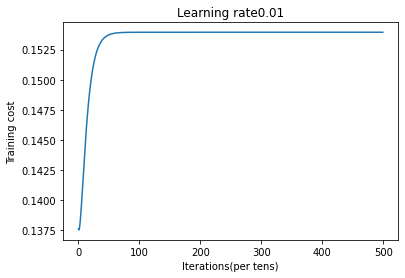

Temperatura Oceánica


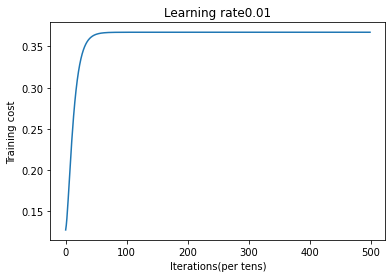

Consumo de Petroleo


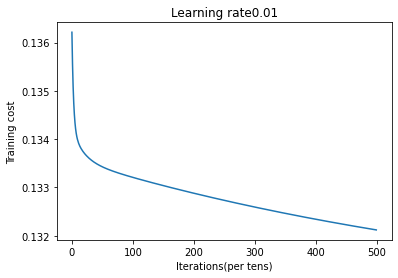

In [129]:
# Llamando a la regresion lineal
learning_rate = 0.01
iterations = 5000
print("Precio Viviendas")
history_price = lineal_regression_model(price_X_train, price_Y_train, price_X_val, price_Y_val, learning_rate, iterations, 1)
print("Temperatura Oceánica")
history_ocean = lineal_regression_model(ocean_X_train, ocean_Y_train, ocean_X_val, ocean_Y_val, learning_rate, iterations, 1)
print("Consumo de Petroleo")
history_petrol = lineal_regression_model(petrol_X_train, petrol_Y_train, petrol_X_val, petrol_Y_val, learning_rate, iterations, 1)

In [100]:
# Tabla RMSE
print(" ----------------------------------------------------------------------------")
print("|          | Precio Viviendas   | Temperatura Oceanica | Consumo de Petróleo |")
print(" ----------------------------------------------------------------------------")
print("|   RMSE   | " + str(history_price[-1].item(2)) + " | " + str(history_ocean[-1].item(2)) + "   | " + str(history_petrol[-1].item(2)) + "  |")
print(" ----------------------------------------------------------------------------")


 ----------------------------------------------------------------------------
|          | Precio Viviendas   | Temperatura Oceanica | Consumo de Petróleo |
 ----------------------------------------------------------------------------
|   RMSE   | 0.5548640806516302 | 0.8570648947762475   | 0.5140422584922648  |
 ----------------------------------------------------------------------------


In [101]:
# Hiperparametros Optimos
learning_rate_v = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iterations_v = [*range(500, 3500, 500)]
history_price = []

for learning_rate in learning_rate_v:
  for iterations in iterations_v:
    history = lineal_regression_model(price_X_train, price_Y_train, price_X_val, price_Y_val, learning_rate, iterations)
    history_price.append([learning_rate_v, iterations, history[-1].item(2)])

print(history_price)

history_ocean = []

for learning_rate in learning_rate_v:
  for iterations in iterations_v:
    history = lineal_regression_model(ocean_X_train, ocean_Y_train, ocean_X_val, ocean_Y_val, learning_rate, iterations)
    history_ocean.append([learning_rate_v, iterations, history[-1].item(2)])

print(history_ocean)


[[[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 500, 0.5544386240600271], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 1000, 0.5548614771255403], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 1500, 0.5548640647704453], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 2000, 0.5548640805547639], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 2500, 0.5548640806510421], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 3000, 0.5548640806516392], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 500, 0.5548640806512748], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 1000, 0.5548640806516313], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 1500, 0.55486408065164], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 2000, 0.5548640806516354], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 2500, 0.5548640806516237], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 3000, 0.5548640806516248], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 500, 0.554864080651636], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 1000, 0.5548640806516295], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 1500, 0.554864080651639], [[0.01, 0.05, 0.1, 0.2, 0.3, 0.4], 2000, 0.5548640806516354], [[0.01, 0.05, 

In [102]:
print("Precio Viviendas")
print(" -------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | RMSE |")
print(" -------------------------------------------")
for his in history_price:  
  print("| " + str(his[0]) +                " | " + str(his[1]) + "    | " + str(his[2]) + "  |")
print(" -------------------------------------------")

print("Temperatura Oceanica")
print(" -------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | RMSE |")
print(" -------------------------------------------")
for his in history_ocean:  
  print("| " + str(his[0]) +                " | " + str(his[1]) + "    | " + str(his[2]) + "  |")
print(" -------------------------------------------")

# print("Consumo de Petróleo")
# print(" -------------------------------------------")
# print("| Tasa de Aprendizaje | Iteraciones | RMSE |")
# print(" -------------------------------------------")
# for his in history_v:  
#   print("| " + str(his[0]) +                " | " + str(his[1]) + "    | " + str(his[2]) + "  |")
# print(" -------------------------------------------")

Precio Viviendas
 -------------------------------------------
| Tasa de Aprendizaje | Iteraciones | RMSE |
 -------------------------------------------
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 500    | 0.5544386240600271  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 1000    | 0.5548614771255403  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 1500    | 0.5548640647704453  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 2000    | 0.5548640805547639  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 2500    | 0.5548640806510421  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 3000    | 0.5548640806516392  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 500    | 0.5548640806512748  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 1000    | 0.5548640806516313  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 1500    | 0.55486408065164  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 2000    | 0.5548640806516354  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 2500    | 0.5548640806516237  |
| [0.01, 0.05, 0.1, 0.2, 0.3, 0.4] | 3000    | 0.5548640806516248  |
| [0.01, 0.05, 0.1, 0.2,

In [0]:
# # history_petrol = []
# print("Consumo de Petróleo")
# print(" -------------------------------------------")
# print("| Tasa de Aprendizaje | Iteraciones | RMSE |")
# print(" -------------------------------------------")
# # for his in history_v:  
# #   print("| " + str(his[0]) +                " | " + str(his[1]) + "    | " + str(his[2]) + "  |")
# for learning_rate in learning_rate_v:
#   for iterations in iterations_v:
#     history = lineal_regression_model(petrol_X_train, petrol_Y_train, petrol_X_val, petrol_Y_val, learning_rate, iterations)
#     # history_petrol.append([learning_rate, iterations, history[-1].item(2)])
#     print("| " + str(learning_rate) +                " | " + str(iterations) + "    | " + str(history[-1].item(2)) + "  |")
# print(" -------------------------------------------")

# # print(history_petrol)

In [104]:
# Grafica Datos price
m = history_price.item((-1,0)).item(0)
b = history_price.item((-1,1))

print("m: " + str(m) + "| b: " + str(b))
m_history_price = history_price[:,0]
b_history_price = history_price[:,1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100).T
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.scatter(price_X_train, price_Y_train)
x = np.arange(-1, 2, 0.2)
y = m * x + b
plt.plot(x, y, '-r')
plt.grid()
plt.show()

AttributeError: ignored

In [0]:
# Ecuacion Normal price
X_1 = np.array([np.ones(np.shape(price_X_train)[0]), price_X_train]).T
B = np.linalg.inv(X_1.T @ X_1) @ X_1.T @ price_Y_train.T
m = B[1]
b = B[0]
print("m:" +  str(B[1]))
print("b:" +  str(B[0]))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.scatter(price_X_train, price_Y_train)
x = np.arange(-1, 2, 0.2)
y = m * x + b
plt.plot(x, y, '-r')
plt.grid()
plt.show()

In [0]:
# Grafica Datos ocean
m = history_ocean.item((-1,0)).item(0)
b = history_ocean.item((-1,1))

print("m: " + str(m) + "| b: " + str(b))
m_history_ocean = history_ocean[:,0]
b_history_ocean = history_ocean[:,1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100).T
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.scatter(ocean_X_train, ocean_Y_train)
x = np.arange(-1, 2, 0.2)
y = m * x + b
plt.plot(x, y, '-r')
plt.grid()
plt.show()

In [0]:
# Ecuacion Normal ocean
X_1 = np.array([np.ones(np.shape(ocean_X_train)[0]), ocean_X_train]).T
B = np.linalg.inv(X_1.T @ X_1) @ X_1.T @ ocean_Y_train.T
m = B[1]
b = B[0]
print("m:" +  str(B[1]))
print("b:" +  str(B[0]))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.scatter(ocean_X_train, ocean_Y_train)
x = np.arange(-1, 2, 0.2)
y = m * x + b
plt.plot(x, y, '-r')
plt.grid()
plt.show()